In [277]:
# Importing the libraries
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn .naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.utils import shuffle
import pickle
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot
import sklearn.metrics as metrics



In [263]:
# Importing the dataset
dataset = pd.read_csv('./training_set.csv')
shuffledfinalDataWithLabel=shuffle(dataset)
X = shuffledfinalDataWithLabel.iloc[:, :-1].values
y = shuffledfinalDataWithLabel.iloc[:, -1].values


In [264]:
#fetching the data from test set
X_test = pd.read_csv('./test_set.csv')


In [265]:
#applying PCA and standerd scalling on training data
pca_matrix = principalComponentAnalysis(X)

Expained Variance: [0.11032044 0.05668818 0.03531712 0.02807364 0.02646588 0.02532699
 0.02442058 0.0239889  0.02260899 0.02216932 0.02113136 0.01986013
 0.01927929 0.01913494 0.01869326 0.01856993 0.01840098 0.01782817
 0.01761592 0.01749538 0.01730195 0.0171877  0.01675396 0.0164784
 0.01632573 0.01597516 0.01579398 0.01543322 0.01521828 0.01499275
 0.01435389 0.01388541 0.01363471 0.01358603 0.01318864]
Expained Variance Sum: 0.793499242937409


In [266]:
#method to apply scalling and PCA
def principalComponentAnalysis(feature_matrix):
    '''
    Performs Standardization of Data
    '''
    #print(feature_matrix)
    std_scaler=preprocessing.StandardScaler()
    std_feature_matrix = std_scaler.fit_transform(feature_matrix)
    std_feature_matrix = pd.DataFrame(std_feature_matrix)
    
    pca = PCA(n_components=35)
    principalComponents = pca.fit_transform(std_feature_matrix)
    file = open("PCA.pkl", 'wb')
    pickle.dump(pca, file)
    file.close()
    print('Expained Variance:',pca.explained_variance_ratio_)
    print('Expained Variance Sum:',pca.explained_variance_ratio_.sum())
    return principalComponents

In [267]:
#K-fold validation to select classification model
def kFoldCrossValidation(X_train,Y_train):

    kfold = model_selection.KFold(n_splits=10)
#    model = LogisticRegression()      
#    model = GaussianNB()  
#    model = svm.NuSVC(gamma='auto')  
#    model = KNeighborsClassifier(n_neighbors=10, algorithm='auto' )  
    model = RandomForestClassifier() 
#    model = DecisionTreeClassifier()  
    
    results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold)
    print("Accuracy after KFold Cross Validation: %.3f%% " % (results.mean()*100.0)) 

In [273]:
#method to train the model
def model_test(X_train, X_test, Y_train, Y_test):

#    kfold = model_selection.KFold(n_splits=10, random_state=42)
#    model = LogisticRegression()   
#    model = GaussianNB()  #61.893%   
#    model = svm.NuSVC(gamma='auto')  
#    model = KNeighborsClassifier(n_neighbors=10, algorithm='auto' ) 
    model = RandomForestClassifier()    
#    model = DecisionTreeClassifier()     
    model.fit(X_train, Y_train)
    filename = 'finalModel.pkl'
    pickle.dump(model, open(filename, 'wb'))
    y_pred=model.predict(X_test)
    result = model.score(X_test, Y_test)
#     print("Confusion matrix :")
#     print(confusion_matrix(Y_test, y_pred))
    confusion_matrix = metrics.confusion_matrix(y_true=Y_test, y_pred=y_pred)
    figure = pyplot.figure(figsize=(8, 8))
    sns.heatmap(confusion_matrix, annot=False,cmap=pyplot.cm.Blues)
    pyplot.tight_layout()
    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')
    pyplot.imshow(confusion_matrix)
    print("Accuracy of Trained Model: %.3f%% " % (result*100.0))

In [274]:
#dividing input data in 4:1 ratio
test_size = 0.2
seed = 42    

#splitting the dataset
X_train, X_validate, Y_train, Y_validate = model_selection.train_test_split(pca_matrix, y, test_size=test_size, random_state=seed)

In [275]:
#calling k fold validation to select clasiifier
kFoldCrossValidation(X_train,Y_train)

Accuracy after KFold Cross Validation: 91.976% 


Accuracy of Trained Model: 93.095% 


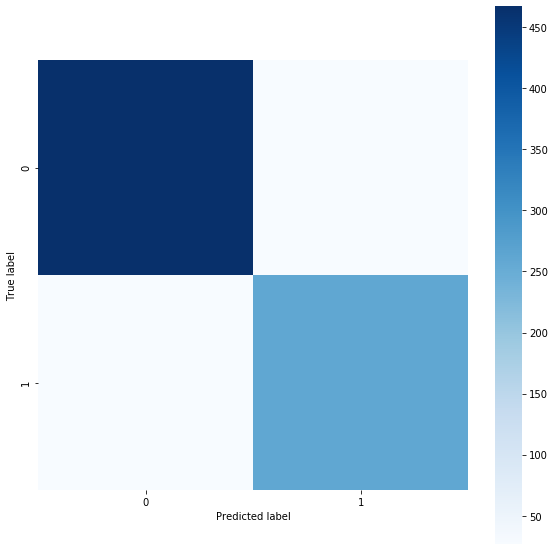

In [278]:
#training model
model_test(X_train, X_validate, Y_train, Y_validate)

In [251]:
file = open('PCA.pkl', 'rb')
pca = pickle.load(file)
file.close()  
std_scaler=preprocessing.StandardScaler()
std_feature_matrix = std_scaler.fit_transform(X_test)
std_feature_matrix = pd.DataFrame(std_feature_matrix)
X_PCA_test=pca.transform(std_feature_matrix)

loaded_model = pickle.load(open('finalModel.pkl', 'rb'))
y_pred=loaded_model.predict(X_PCA_test)

#predicting the output for test dataset
print("\nThe predicted results are as follows:")
print(y_pred)



The predicted results are as follows:
[0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1
 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0
 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0
 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1
 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0
 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1
 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 